In [ ]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data
import numpy as np
import pandas as pd

#Other
from collections import Counter

import import_ipynb
from models import TrajectoryDatasetTest
from models import TrajectoryDatasetTrain

In [3]:
train_data = np.load('cse-251-b-2025/input/train.npz')['data']
test_data  = np.load('cse-251-b-2025/input/test_input.npz')['data']

X_train = train_data[..., :50, :] # Input (scenes, agents, first 50 timesteps, features)
Y_train = train_data[:, 0, 50:, :2] # Output (scenes, ego car, next 60 timesteps, x/y coordinates)

# Print data shape
print(train_data.shape, test_data.shape)

(10000, 50, 110, 6) (2100, 50, 50, 6)


10000


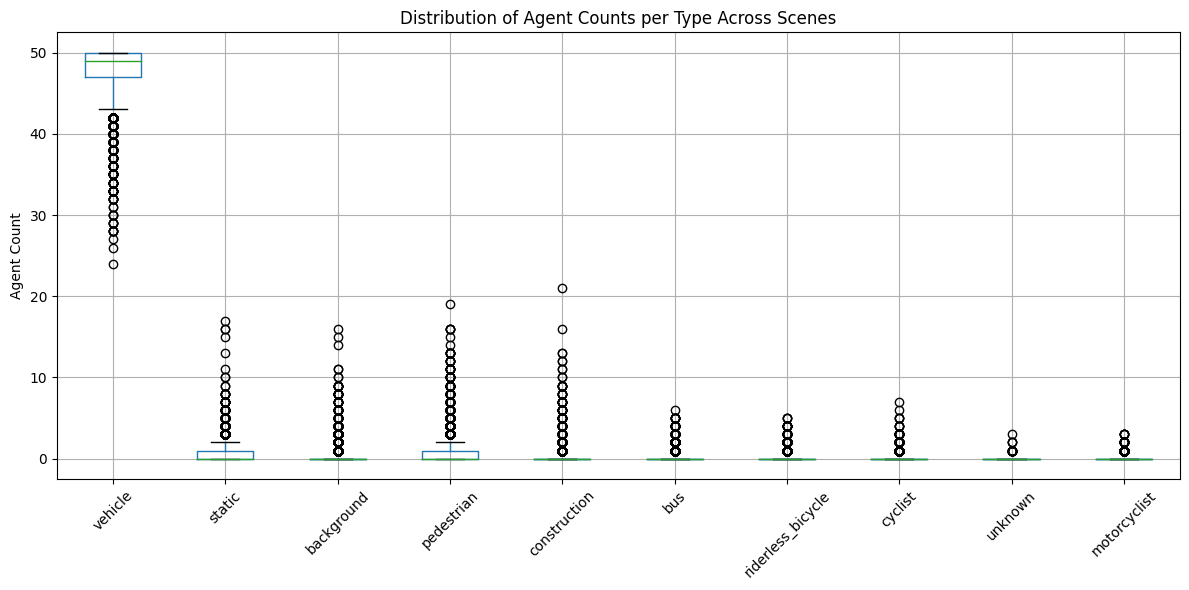

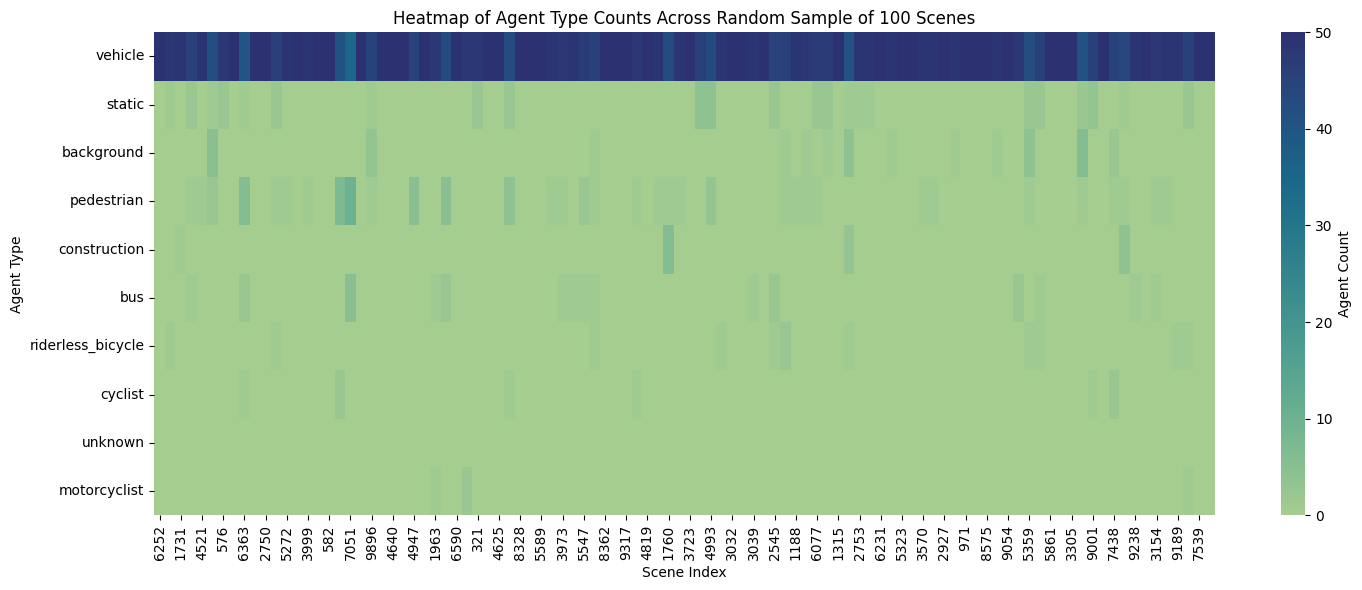

In [4]:
object_type = ['vehicle', 'pedestrian', 'motorcyclist', 'cyclist', 'bus', 
               'static', 'background', 'construction', 'riderless_bicycle', 'unknown']

scene_agent_counts = []

for scene in X_train:
    # Count agent types in the current scene
    label_counts = Counter(int(agent[0, 5]) for agent in scene)
    
    # Convert label integers to object type names
    count_dict = {object_type[label]: count for label, count in label_counts.items()}
    
    scene_agent_counts.append(count_dict)

print(len(scene_agent_counts))
# Convert list of dicts into DataFrame (missing values will become NaN)
df = pd.DataFrame(scene_agent_counts).fillna(0)
random_sample = df.sample(n=100, random_state=42)

# Optional: convert counts to integers
df = df.astype(int)

df.boxplot(figsize=(12, 6))
plt.title("Distribution of Agent Counts per Type Across Scenes")
plt.ylabel("Agent Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.heatmap(random_sample.T, cmap="crest", cbar_kws={'label': 'Agent Count'})
plt.xlabel("Scene Index")
plt.ylabel("Agent Type")
plt.title("Heatmap of Agent Type Counts Across Random Sample of 100 Scenes")
plt.tight_layout()
plt.show()

In [6]:
def plot_heatmap(data, title=None, bins=5):
    plt.figure(figsize=(6, 6))

    x_max = data[..., 0].max()
    x_min = data[..., 0].min()
    y_max = data[..., 1].max()
    y_min = data[..., 1].min()

    plt.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='hot')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.colorbar(label='Density')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [7]:
# Plotting the heat map of the input x, y coordinates of agents in the first 50 timesteps
xy_in = train_data[:, :, :50, :2].reshape(-1, 2)
xy_in_not_0 = xy_in[(xy_in[:, 0] != 0) & (xy_in[:, 1] != 0)]

print(xy_in[0])

[ 338.59322192 -672.21574762]


In [8]:
# Plotting the heat map of the output x, y coordinates of agents in the next 60 timesteps
xy_out = train_data[:, :, 50:, :2].reshape(-1, 2)
xy_out_not_0 = xy_out[(xy_out[:, 0] != 0) & (xy_out[:, 1] != 0)]

print(xy_out[0])

[ 287.20506697 -656.44786782]


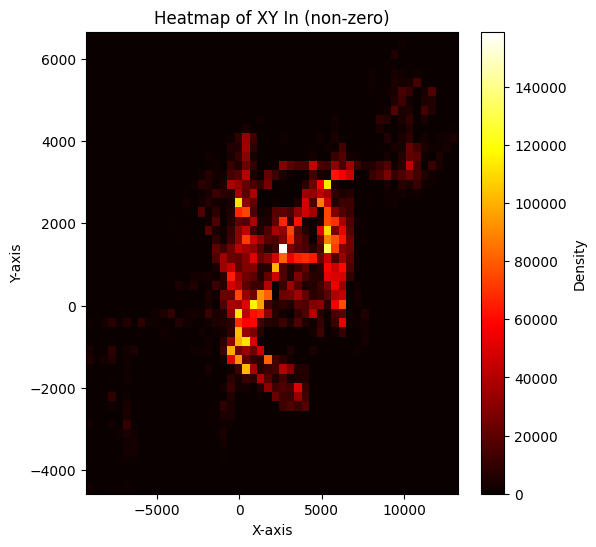

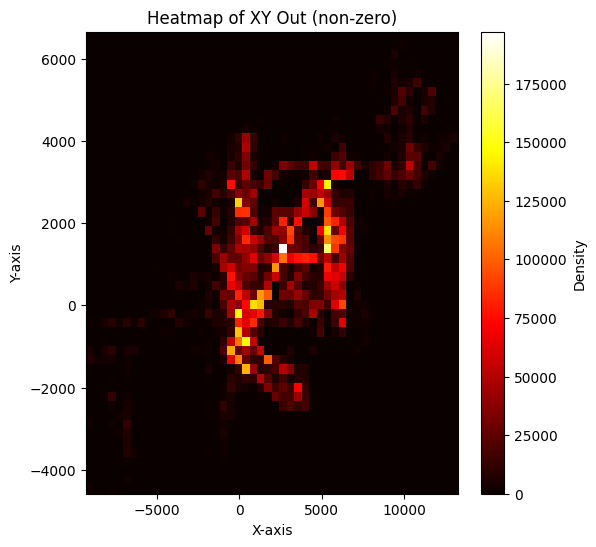

In [9]:
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=50)
plot_heatmap(xy_out_not_0, title='Heatmap of XY Out (non-zero)', bins=50)

/var/folders/bq/35hn23493zq3rqplfdf0mhxr0000gn/T/ipykernel_99465/1463530499.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


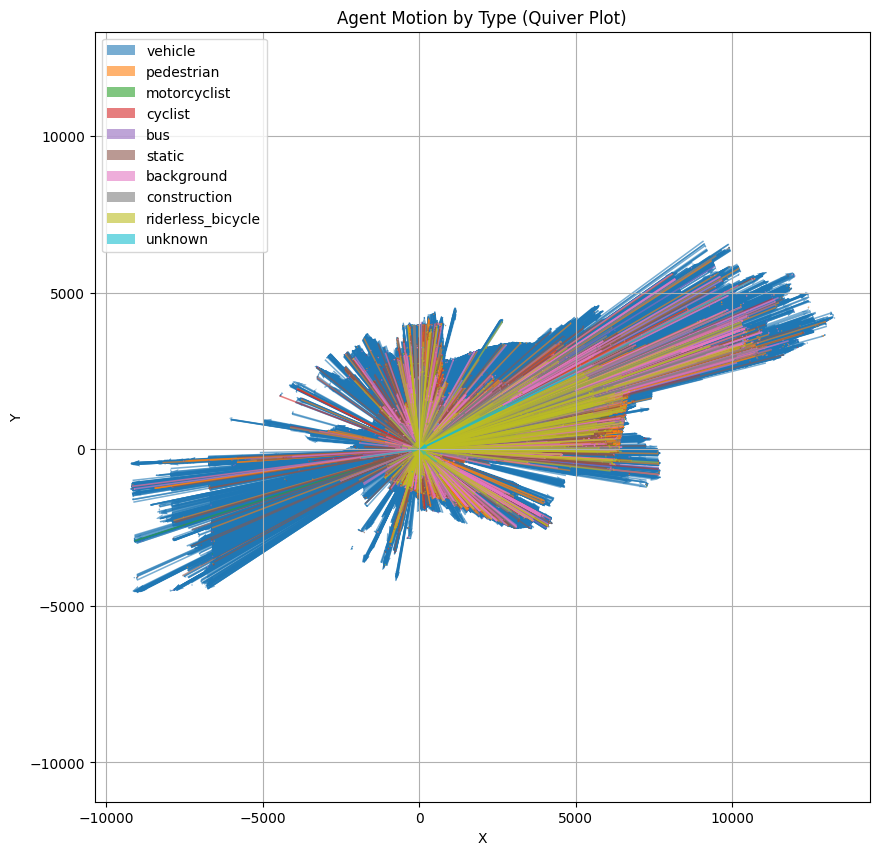

In [11]:
agent_labels = ['vehicle', 'pedestrian', 'motorcyclist', 'cyclist', 'bus', 'static', 
                'background', 'construction', 'riderless_bicycle', 'unknown']
colors = plt.cm.get_cmap('tab10', 10)

xy_in = train_data[:, :, 49, :2]   # (scenes, agents, 2)
xy_out = train_data[:, :, 109, :2] # (scenes, agents, 2)

agent_types = train_data[:, :, 0, 5].astype(int)

xy_in_flat = xy_in.reshape(-1, 2)
xy_out_flat = xy_out.reshape(-1, 2)
agent_types_flat = agent_types.flatten()

# Compute displacements
dxdy = xy_out_flat - xy_in_flat

plt.figure(figsize=(10, 10))
for i in range(10):
    mask = agent_types_flat == i
    if np.sum(mask) == 0:
        continue
    plt.quiver(
        xy_in_flat[mask, 0], xy_in_flat[mask, 1],
        dxdy[mask, 0], dxdy[mask, 1],
        color=colors(i),
        scale=1, scale_units='xy', angles='xy',
        label=agent_labels[i],
        alpha=0.6, width=0.002
    )
plt.title("Agent Motion by Type (Quiver Plot)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()